<a href="https://colab.research.google.com/github/Rakshanax/Prediction-Of-Alzheimer-s-Disease/blob/main/alzheimer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 #Loading mri dataset as a zipfile
from zipfile import ZipFile
dataset = "/content/drive/MyDrive/dataset.zip"

In [ ]:
#extracting zip file
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('Done')

Done


###Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow 
import keras  
import os
import glob 
from sklearn.model_selection import train_test_split
from skimage import io 
import random 
import warnings
from skimage.color import rgb2gray
from skimage import filters
from matplotlib import pyplot as plt
plt.style.use('seaborn') 
import seaborn as sns
%matplotlib inline
from skimage.exposure import histogram
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
import cv2


<ipython-input-6-e8d5bb1078b5>:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


#**IMAGE PREPROCESSING**

In [ ]:
#preparing data
path = os.listdir('/content/dataset')
classes = {'no-alzheimer':0, 'alzheimer':1}

In [ ]:
X = []
Y = []
for cls in classes:
    pth = '/content/dataset/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (128,128))
        X.append(img)
        Y.append(classes[cls])

In [ ]:
X = np.array(X)
Y = np.array(Y)
print(X.shape)
X_updated = X.reshape(len(X), -1)

(4148, 128, 128)


In [ ]:
np.unique(Y)

array([0, 1])

In [ ]:
pd.Series(Y).value_counts()

0    3200
1     948
dtype: int64

In [ ]:
X.shape, X_updated.shape

((4148, 128, 128), (4148, 16384))

In [ ]:
try:
    print('RESIZED', X[15].shape)
except AttributeError:
    print("shape not found")

RESIZED (128, 128)


In [ ]:
def displayImg(img):
  plt.imshow(img, cmap='gray')

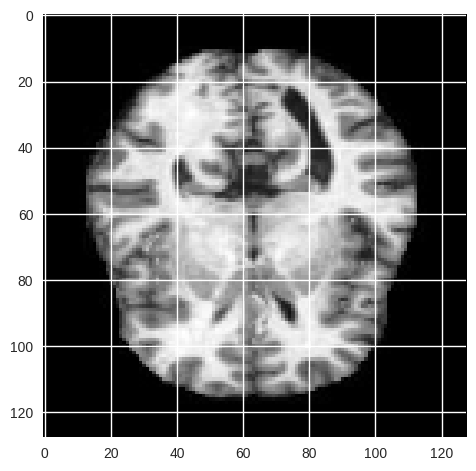

In [ ]:
#visualizing the data
displayImg(X[777])

### DENOISING AND ENCHACEMENT

In [ ]:
#denoising and enchancing
i=0
contrast = 0.8
bright = 2
for img in X:
  X[i] = cv2.bilateralFilter(X[i],10,5,5)
  X[i] = np.clip(contrast*X[i]+bright,0,255)

  i=i+1

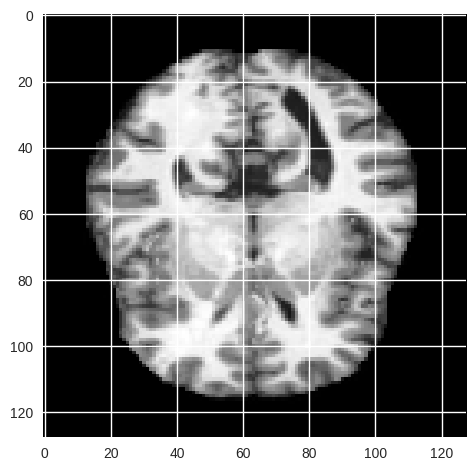

In [ ]:
displayImg(X[777])

In [ ]:
# grayscale = rgb2gray(X[777])#Edge Detection
grayscale = X[777]
ed_sobel = filters.sobel(X[777])

Text(0, 0.5, 'Number of pixels')

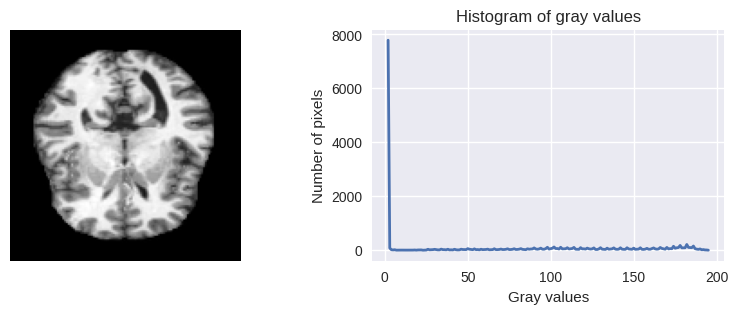

In [ ]:
hist, hist_centers = histogram(grayscale)
#Plotting the Image and the Histogram of gray values
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].imshow(grayscale, cmap=plt.cm.gray)
axes[0].axis('off')
axes[1].plot(hist_centers, hist, lw=2)
axes[1].set_title('Histogram of gray values')
plt.xlabel("Gray values")
plt.ylabel("Number of pixels")

Saturated (128, 128)


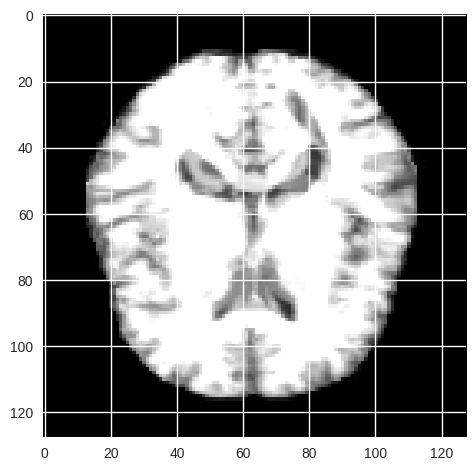

In [ ]:
# Applying OpenCV addition on images
fimg1 = cv2.add(X[777], X[888])
displayImg(fimg1)
print('Saturated',fimg1.shape)

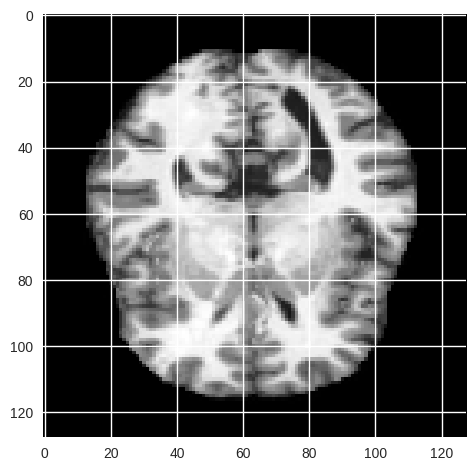

In [ ]:
# Applying NumPy scalar multiplication on image
fimg2 = X[777]  * 5.5
displayImg(fimg2)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,test_size=.3)
xtrain.shape, xtest.shape

((2903, 16384), (1245, 16384))

In [ ]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

205 2
204 2
0.803921568627451 0.00784313725490196
0.8 0.00784313725490196


# **SVM**

## TRAIN MODEL

In [ ]:
sv = SVC(kernel='rbf')
sv.fit(xtrain, ytrain)

SVC()

## EVALUATION

In [ ]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9324836376162591
Testing Score: 0.9020080321285141


## PREDICTION

In [ ]:
pred = sv.predict(xtest)

In [ ]:
`

(array([   4,    6,   21,   30,   64,  124,  134,  142,  145,  152,  157,
         168,  195,  211,  222,  234,  242,  263,  266,  274,  275,  288,
         290,  298,  305,  321,  331,  338,  344,  347,  363,  365,  370,
         378,  382,  388,  391,  393,  397,  417,  429,  435,  446,  452,
         454,  489,  490,  492,  505,  507,  516,  541,  549,  550,  554,
         563,  583,  588,  604,  612,  616,  619,  634,  637,  668,  698,
         703,  704,  725,  731,  734,  735,  742,  778,  779,  801,  804,
         814,  822,  833,  836,  837,  844,  861,  863,  864,  870,  872,
         884,  890,  899,  900,  910,  916,  930,  936,  953,  962,  964,
         996, 1007, 1022, 1037, 1041, 1064, 1077, 1080, 1081, 1083, 1084,
        1105, 1115, 1145, 1152, 1183, 1196, 1201, 1202, 1210, 1213, 1220,
        1244]),)

In [ ]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  122
1 1


###Accuracy


In [ ]:
sv.fit(xtrain, ytrain)
predicted = sv.predict(xtest)
svmacc = accuracy_score(ytest,predicted)
print (svmacc)


0.9020080321285141


### Confusion Matrix

In [ ]:
cf_matrix= confusion_matrix(predicted,ytest)
cf_matrix

array([[949, 120],
       [  2, 174]])

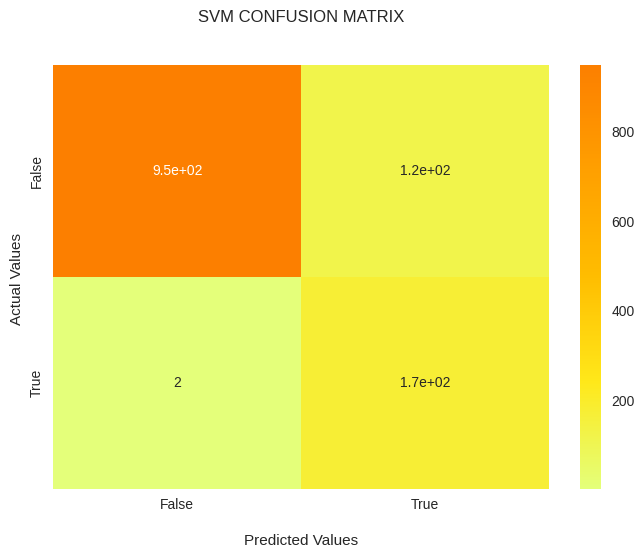

In [ ]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Wistia')

ax.set_title('SVM CONFUSION MATRIX\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


### Classification report

In [ ]:
##To print Classification report
target_names = ['Yes', 'No']
print(classification_report(ytest, predicted, target_names=target_names))

              precision    recall  f1-score   support

         Yes       0.89      1.00      0.94       951
          No       0.99      0.59      0.74       294

    accuracy                           0.90      1245
   macro avg       0.94      0.79      0.84      1245
weighted avg       0.91      0.90      0.89      1245



In [ ]:
svmprec = precision_score(ytest,predicted)	
print(svmprec)

0.9886363636363636


In [ ]:
svmrec = recall_score(ytest,predicted)
print(svmrec)

0.5918367346938775


In [ ]:
svmf = f1_score(ytest,predicted)
print(svmf)

0.7404255319148936


# **RANDOM** **FOREST**

In [ ]:
model=RandomForestClassifier(n_estimators=700,max_depth=4)

In [ ]:
model.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=4, n_estimators=700)

## PREDICTION

In [ ]:
y_pred=model.predict(xtest)

In [ ]:
misclassified=np.where(ytest!=y_pred)
misclassified
print("Total Misclassified Samples: ",len(misclassified[0]))
print(y_pred[36],ytest[36])

Total Misclassified Samples:  213
0 1


### Accuracy

In [ ]:
rfacc=accuracy_score(ytest,y_pred)
print(rfacc)
##print(classification_report(y_pred,ytest))

0.8289156626506025


### Confusion Matrix

In [ ]:
cf_matrix=confusion_matrix(y_pred,ytest)
print(cf_matrix)

[[948 210]
 [  3  84]]


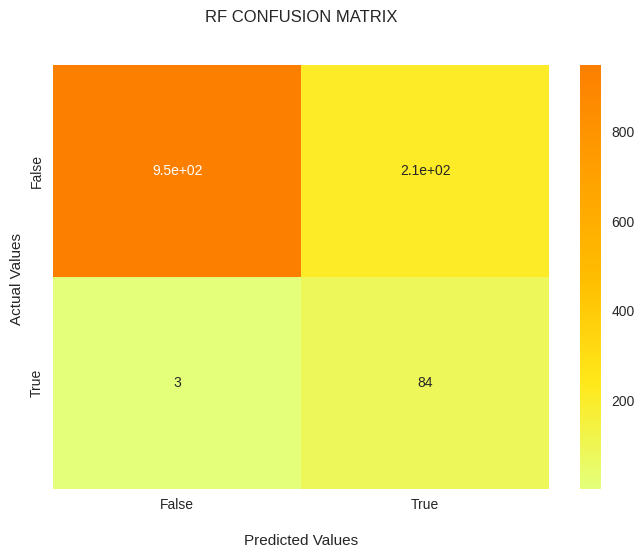

In [ ]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Wistia')

ax.set_title('RF CONFUSION MATRIX\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### Classification report

In [ ]:
target_names = ['Yes', 'No']
print(classification_report(ytest, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Yes       0.82      1.00      0.90       951
          No       0.97      0.29      0.44       294

    accuracy                           0.83      1245
   macro avg       0.89      0.64      0.67      1245
weighted avg       0.85      0.83      0.79      1245



In [ ]:
rfprec = precision_score(ytest,y_pred)
print(rfprec)

0.9655172413793104


In [ ]:
rfrec = recall_score(ytest,y_pred)
print(rfrec)

0.2857142857142857


In [ ]:
rff = f1_score(ytest,y_pred)
print(rff)

0.4409448818897638


# TESTING MODELS

In [ ]:
dec = {0:'No Alzheimer', 1:'Positive Alzheimer'}

In [ ]:
print(img)

[[2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]


mildDem241.jpg
(128, 128)
30 (26).jpg
(128, 128)
mildDem286.jpg
(128, 128)
mildDem120.jpg
(128, 128)
mildDem460.jpg
(128, 128)
moderateDem48.jpg
(128, 128)
32 (9).jpg
(128, 128)
mildDem479.jpg
(128, 128)
moderateDem50.jpg
(128, 128)


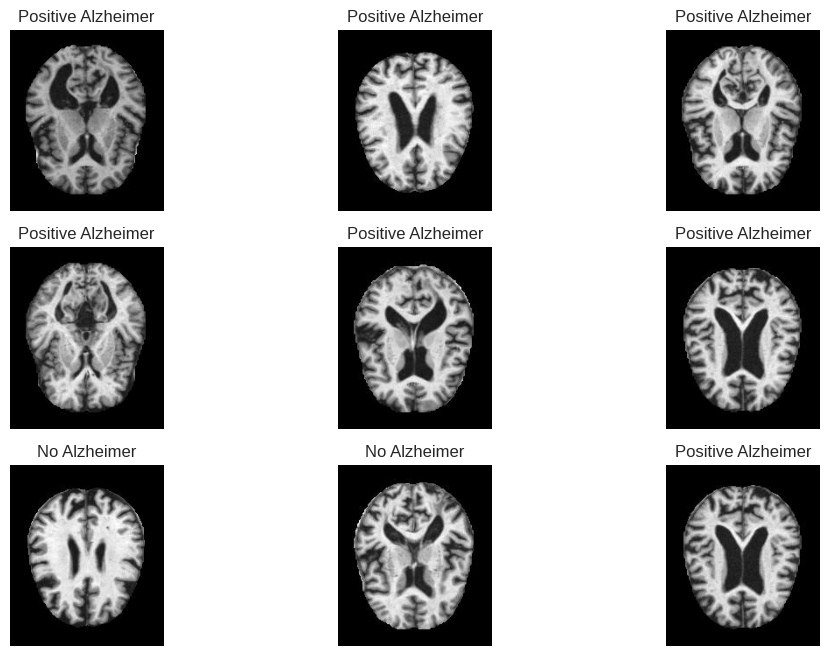

In [ ]:
#SVM - ALZHEIMER
plt.figure(figsize=(12,8))
p = os.listdir('/content/dataset')
c=1
for i in os.listdir('/content/dataset/alzheimer'):
    if c == 10:
      break
    plt.subplot(3,3,c)
    print(i)
    url = '/content/dataset/alzheimer/'+i
    img = cv2.imread(url,0)
    img1 = cv2.resize(img, (128,128))
    img1 = np.array(img1)
    print(img1.shape)
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

mildDem241.jpg
(128, 128)
30 (26).jpg
(128, 128)
mildDem286.jpg
(128, 128)
mildDem120.jpg
(128, 128)
mildDem460.jpg
(128, 128)
moderateDem48.jpg
(128, 128)
32 (9).jpg
(128, 128)
mildDem479.jpg
(128, 128)
moderateDem50.jpg
(128, 128)


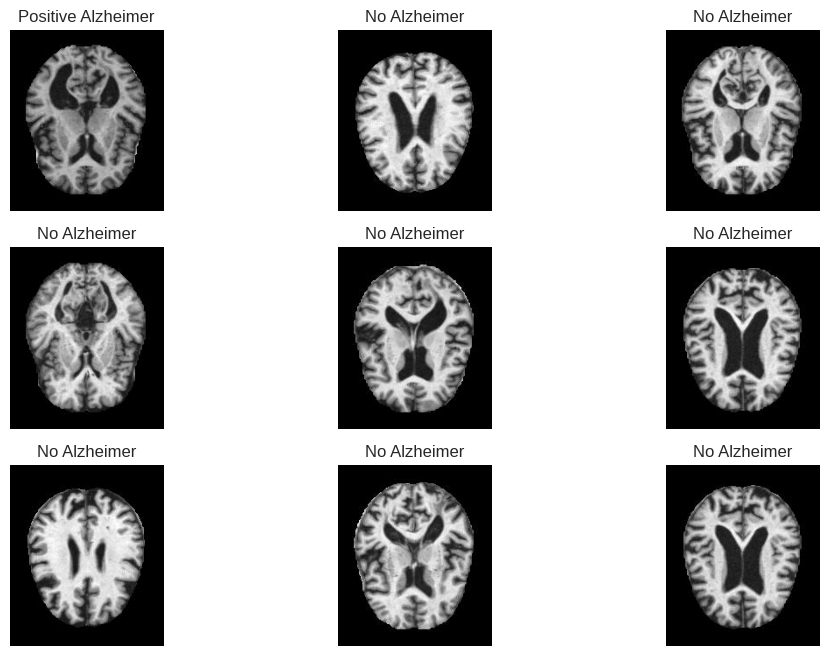

In [ ]:
#RF - ALZHEIMER
plt.figure(figsize=(12,8))
p = os.listdir('/content/dataset')
c=1
for i in os.listdir('/content/dataset/alzheimer'):
    if c == 10:
      break
    plt.subplot(3,3,c)
    print(i)
    url = '/content/dataset/alzheimer/'+i
    img = cv2.imread(url,0)
    img1 = cv2.resize(img, (128,128))
    img1 = np.array(img1)
    print(img1.shape)
    img1 = img1.reshape(1,-1)/255
    p = model.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)


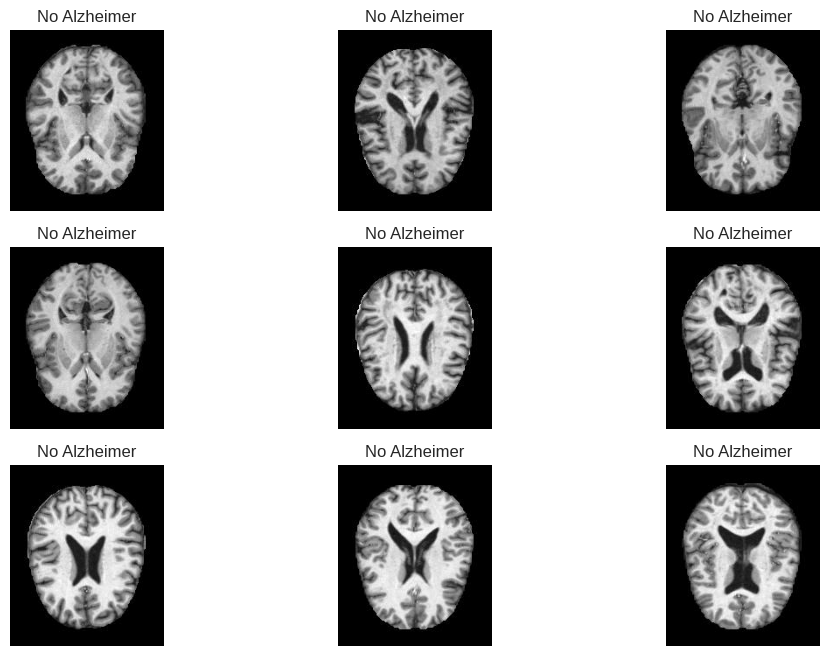

In [ ]:
#SVM - NO-ALZHEIMER
plt.figure(figsize=(12,8))
p = os.listdir('/content/dataset/alzheimer')
c=1
for i in os.listdir('/content/dataset/no-alzheimer'):
    if c == 10:
      break
    plt.subplot(3,3,c)
    url = '/content/dataset/no-alzheimer/'+i
    img = cv2.imread(url,0)
    img1 = cv2.resize(img, (128,128))
    img1 = np.array(img1)
    print(img1.shape)
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)


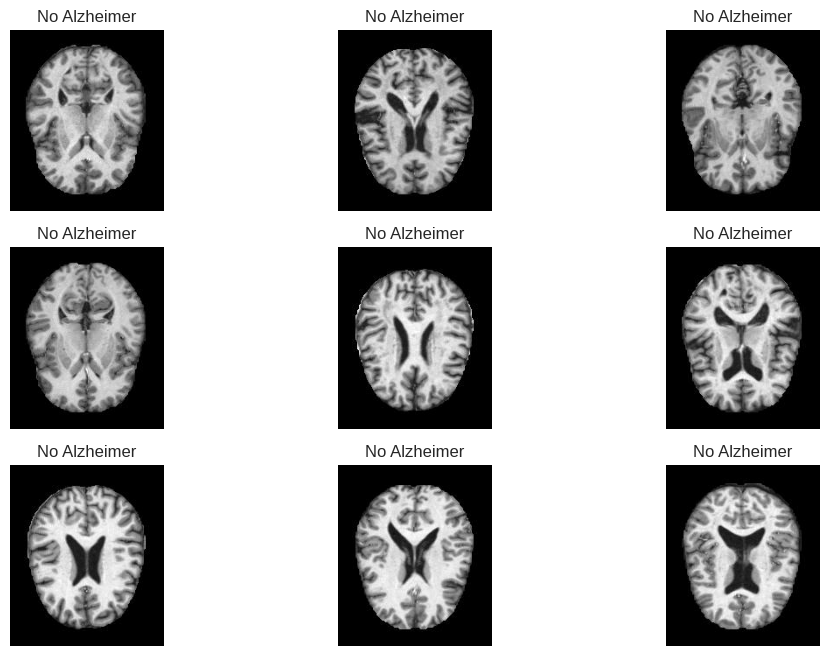

In [ ]:
#RF- NO-ALZHEIMER
plt.figure(figsize=(12,8))
p = os.listdir('/content/dataset/alzheimer')
c=1
for i in os.listdir('/content/dataset/no-alzheimer'):
    if c == 10:
      break
    plt.subplot(3,3,c)
    url = '/content/dataset/no-alzheimer/'+i
    img = cv2.imread(url,0)
    img1 = cv2.resize(img, (128,128))
    img1 = np.array(img1)
    print(img1.shape)
    img1 = img1.reshape(1,-1)/255
    p = model.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

###ROC CURVE

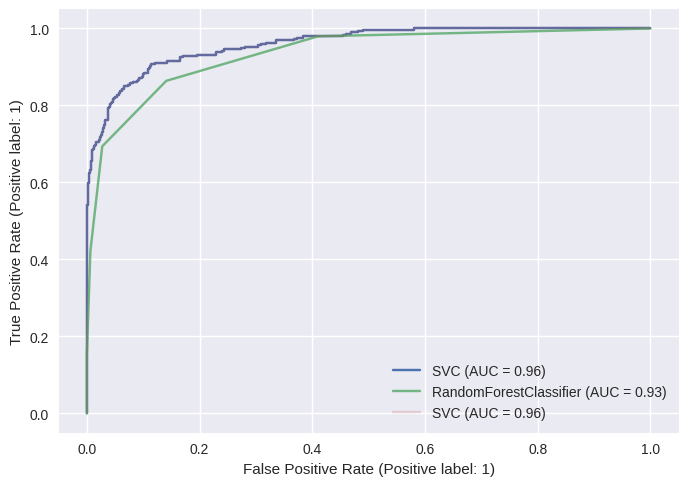

In [ ]:
svc_disp = RocCurveDisplay.from_estimator(sv, xtest, ytest)
rfc = RandomForestClassifier(n_estimators=5, random_state=10)
rfc.fit(xtrain, ytrain)
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, xtest, ytest, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.2)
plt.show()

## **PERFORMANCE MEASURES**

In [ ]:
def cm_to_inch(value):
    return value/2.54

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center', fontsize=12, color='black')

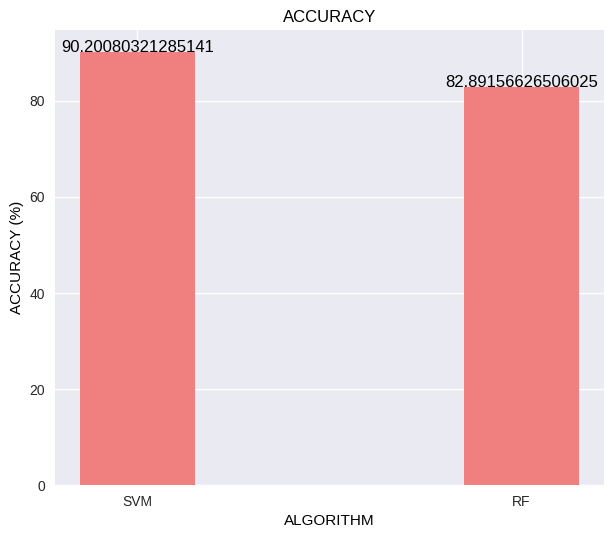

In [ ]:
x = np.array(["SVM","RF",""])
y = np.array([svmacc*100,rfacc*100])
plt.figure(figsize=(cm_to_inch(18), cm_to_inch(15)))
plt.bar(x,y, width = 0.3, color='lightcoral')
addlabels(x,y) 
plt.title('ACCURACY', color='black')
plt.xlabel("ALGORITHM", color='black')
plt.ylabel("ACCURACY (%)",color='black')
plt.show()

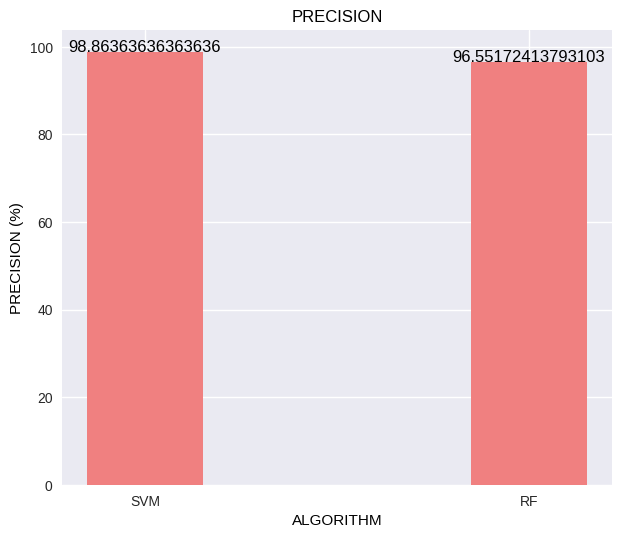

In [ ]:
x = np.array(["SVM","RF"])
y = np.array([svmprec*100,rfprec*100])
plt.figure(figsize=(cm_to_inch(18), cm_to_inch(15)))
plt.bar(x,y, width = 0.3, color='lightcoral')
addlabels(x,y)
plt.title('PRECISION', color='black')
plt.xlabel("ALGORITHM", color='black')
plt.ylabel("PRECISION (%)", color='black')
plt.show()

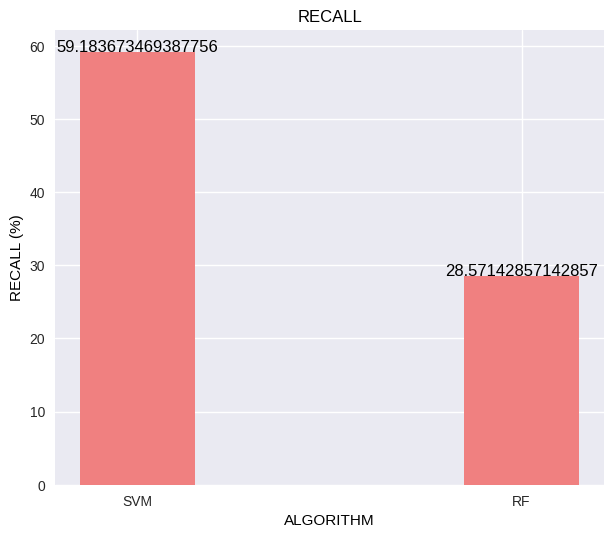

In [ ]:
x = np.array(["SVM","RF"])
y = np.array([svmrec*100,rfrec*100])
plt.figure(figsize=(cm_to_inch(18), cm_to_inch(15)))
plt.bar(x,y, width = 0.3, color='lightcoral')
addlabels(x,y)
plt.title('RECALL', color='black')
plt.xlabel("ALGORITHM", color='black')
plt.ylabel("RECALL (%)", color='black')
plt.show()

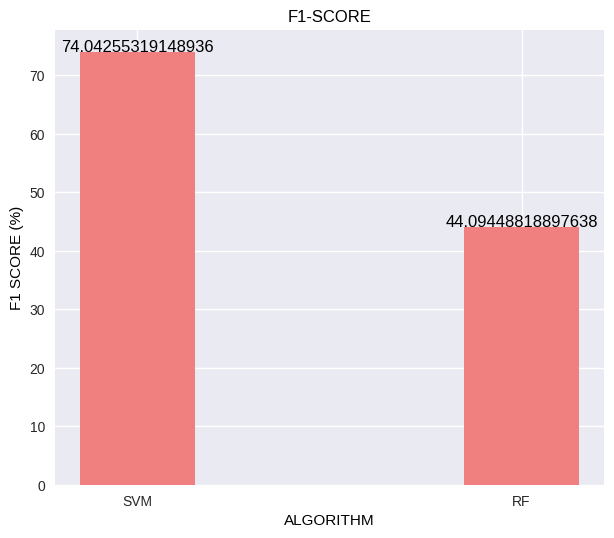

In [ ]:
x = np.array(["SVM","RF"])
y = np.array([svmf*100,rff*100])
plt.figure(figsize=(cm_to_inch(18), cm_to_inch(15)))
plt.bar(x,y, width = 0.3, color='lightcoral')
addlabels(x,y)
plt.title('F1-SCORE', color='black')
plt.xlabel("ALGORITHM", color='black')
plt.ylabel("F1 SCORE (%)", color='black')
plt.show()

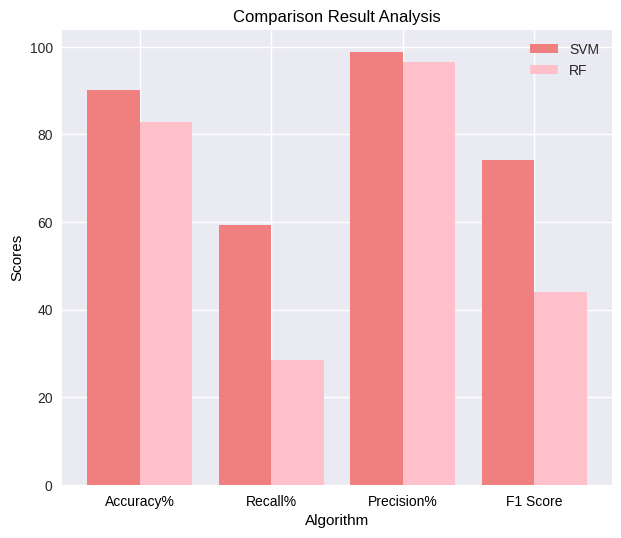

In [ ]:
X = ['Accuracy%', 'Recall%', 'Precision%', 'F1 Score']
svm_stats = [svmacc*100, svmrec*100, svmprec*100, svmf*100]
rf_stats = [rfacc*100, rfrec*100, rfprec*100, rff*100]

X_axis = np.arange(len(X))
plt.figure(figsize=(cm_to_inch(18), cm_to_inch(15)))

plt.bar(X_axis - 0.2, svm_stats, 0.4, label = 'SVM', color='lightcoral')
plt.bar(X_axis + 0.2, rf_stats, 0.4, label = 'RF', color='pink')

plt.xticks(X_axis, X, color='black')
plt.xlabel("Algorithm", color='black')
plt.ylabel("Scores", color='black')
plt.title("Comparison Result Analysis", color='black')
plt.legend()
plt.show()
